In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from reader import NGIMSReader

In [4]:
r = NGIMSReader()

In [65]:
url = "https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2020/06/mvn_ngi_l2_csn-abund-36822_20200603T115804_v08_r01.csv"
df = r.read(url)

In [38]:
from data_path_handler import choose_formatter, NGIMSFilename

In [33]:
import datetime as dt
fb = choose_formatter(pds=True)

In [84]:
files = fb.find_files_within_date_range(dt.datetime(2022, 12, 15), dt.datetime(2023, 3, 2), "csn-abund")
files

['https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2022/12//mvn_ngi_l2_csn-abund-49106_20221215T012028_v08_r03.csv',
 'https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2022/12//mvn_ngi_l2_csn-abund-49108_20221215T045940_v08_r03.csv',
 'https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2022/12//mvn_ngi_l2_csn-abund-49110_20221215T083853_v08_r03.csv',
 'https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2022/12//mvn_ngi_l2_csn-abund-49112_20221215T121805_v08_r03.csv',
 'https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2022/12//mvn_ngi_l2_csn-abund-49132_20221217T005004_v08_r03.csv',
 'https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2022/12//mvn_ngi_l2_csn-abund-49134_20221217T042916_v08_r03.csv',
 'https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2022/12//mvn_ngi_l2_csn-abund-49136_20221217T080828_v08_r03.csv',
 'https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2022/12//mvn_ngi_l2_csn-abund-49138_20221217T11474

In [85]:
files[0], files[-1]

('https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2022/12//mvn_ngi_l2_csn-abund-49106_20221215T012028_v08_r03.csv',
 'https://atmos.nmsu.edu/PDS/data/PDS4/MAVEN/ngims_bundle/l2/2023/03//mvn_ngi_l2_csn-abund-50116_20230301T220257_v08_r03.csv')

<Axes: xlabel='t_utc'>

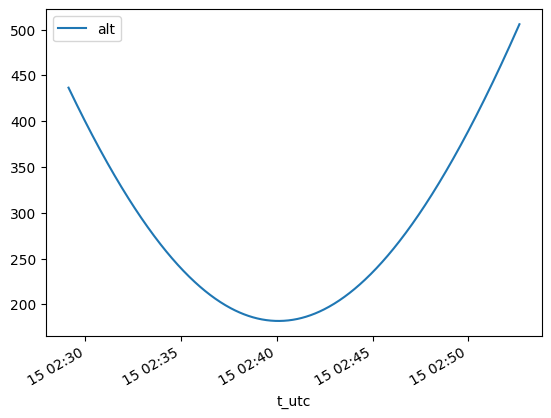

In [64]:
r.read(files[0]).plot(x="t_utc", y="alt")

In [74]:
from reader import NGIMSLoader

In [95]:
l = NGIMSLoader()
dfdt = l.load(date_range=(dt.datetime(2018, 1, 1), dt.datetime(2018,1, 3)), file_label="csn-abund")

In [94]:
dfdt["orbit"].unique()

array([6330, 6331, 6332, 6333, 6334, 6335, 6336, 6337, 6338])

In [152]:
import pandas as pd
def IO_orb(orbdata,io='I') -> pd.DataFrame:
    minalt = orbdata['alt'].min()
    peri_t = orbdata[orbdata['alt']==minalt]['t_unix'].unique()
    #if len(peri_t)>1:
    #    sys.exit('Non-unique time found at periapse '+str(orbdata['orbit'].unique()))
    #else:
    if io == 'I':
        return orbdata[orbdata['t_unix']<=peri_t[0]]
    elif io =='O':
        return orbdata[orbdata['t_unix']>peri_t[0]]
    else:
        return orbdata
    
def hp_from_fit(ratio, slope, intercept):
    return (np.log(ratio)-intercept)/slope

In [167]:
single_orb = dfdt[dfdt["orbit"].between(6330, 6336)]
print(single_orb.shape)
single_orb_inbound = IO_orb(single_orb)
single_orb_inbound_abund = single_orb_inbound.pivot_table(values=["abundance"], index=["alt", "species"]).unstack()
# Filter to reasonable values
single_orb_inbound_abund = single_orb_inbound_abund[((single_orb_inbound_abund["abundance"]["Ar"])>0)].dropna(subset=[("abundance", "N2"), (("abundance", "Ar"))]).sort_values("alt")
n2ar_profile = (single_orb_inbound_abund["abundance"]["N2"]/single_orb_inbound_abund["abundance"]["Ar"])

(29604, 18)


In [168]:
single_orb_inbound_abund

abundance                                            \
species             Ar            CO           CO2            He   
alt                                                                
139.7972  1.662252e+07  2.252942e+08  6.458217e+08  1.434379e+06   
139.8005  1.640645e+07  2.213564e+08  6.343717e+08  1.470355e+06   
139.8101  1.638082e+07  2.203913e+08  6.236607e+08  1.493964e+06   
139.8262  1.705553e+07  2.272635e+08  6.489838e+08  1.411694e+06   
139.8487  1.765436e+07  2.304491e+08  6.718445e+08  1.331070e+06   
...                ...           ...           ...           ...   
233.5295  2.981777e+03  5.600924e+05  5.144250e+05  1.376191e+05   
234.5919  1.095241e+03  5.167245e+05  5.173663e+05  1.331933e+05   
235.6599  1.335426e+03  4.803649e+05  4.948414e+05  1.287873e+05   
236.1938  1.443317e+03  4.894095e+05  6.219912e+05  1.794425e+05   
237.2751  4.702728e+02  4.617393e+05  5.988966e+05  1.393720e+05   

                                      
species             N2             O  
alt                                   
139.7972  8.874094e+07  9.711786e+07  
139.8005  8.871532e+07  9.676425e+07  
139.8101  8.859592e+07  9.728099e+07  
139.8262  9.165969e+07  9.952545e+07  
139.8487  9.396142e+07  9.961017e+07  
...                ...           ...  
233.5295  2.758081e+05  4.829289e+06  
234.5919  2.553553e+05  4.712759e+06  
235.6599  2.598909e+05  4.651879e+06  
236.1938  2.654776e+05  4.934638e+06  
237.2751  3.460899e+05  4.869263e+06  

[1442 rows x 6 columns]

In [169]:
import numpy as np
import matplotlib.pyplot as plt

In [160]:
import scipy.stats as sps

In [170]:
fit = sps.linregress(n2ar_profile.index.values, np.log(n2ar_profile.values))

101.31239383043292


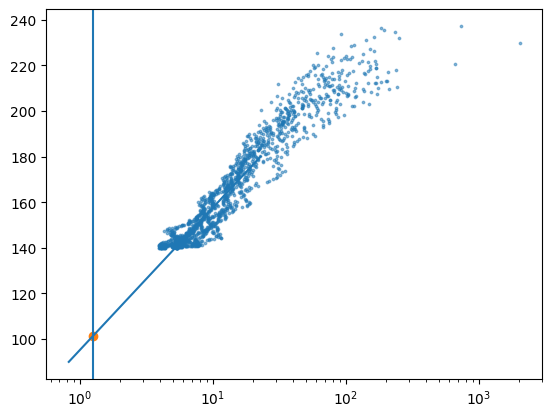

In [174]:
alts = np.linspace(90, 180, 100)

hp = hp_from_fit(1.25, fit[0], fit[1])
print(hp)

plt.figure()
plt.scatter(n2ar_profile, n2ar_profile.index, s=3, alpha=0.5)
plt.plot(np.exp(fit[1]+alts*fit[0]), alts)
plt.axvline(1.25)
plt.scatter(1.25, hp)
plt.xscale("log")

In [ ]:
# set time range you'll look over (2-3 days?)
# determine minimum number of orbits
# reduce to N2 and Ar
# Reduce to inbound
# calculate HP:
#   IO_orb
#   
# find first orbit